<h2> Data Preprocessing</h2>

In [1]:
import math
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
data_matrix = pd.read_csv("precipitation_data.csv",sep="\t")
type(data_matrix)

pandas.core.frame.DataFrame

In [3]:
data_matrix.set_index('Year', inplace=True)
data_matrix = data_matrix.transpose()
data_matrix.head()

Year,1962,1963,1964,1965,1966,1967,1968,1969,1970,1971,...,1986,1987,1988,1989,1990,1991,1992,1993,1994,1995
Jan,0.101,0.000,0.151,0.272,5.439,1.318,2.708,0.000,3.224,0.168,...,3.715,20.370,0.000,0.000,1.015,0.801,0.000,0.000,12.229,14.457
Feb,1.929,5.253,0.501,0.082,1.949,0.705,54.213,0.000,0.000,0.000,...,14.900,9.832,10.810,0.000,0.324,1.218,0.000,1.527,6.256,0.000
Mar,1.320,16.215,12.017,0.000,4.044,3.735,35.990,0.804,0.000,0.660,...,0.000,15.877,0.000,31.565,9.896,1.198,0.000,2.011,7.880,22.736
Apr,37.500,23.023,7.681,2.093,5.869,1.509,3.302,4.353,26.318,1.926,...,20.486,3.965,32.308,8.615,0.362,21.545,3.621,5.291,29.439,2.986
May,58.018,26.511,1.747,0.966,10.855,45.454,8.995,9.161,31.172,31.948,...,8.828,46.877,14.328,14.656,117.784,16.512,31.013,5.426,14.410,47.057


In [4]:
dates = pd.date_range(start='1965-01', freq='MS', periods=len(data_matrix.columns)*12)
dates

DatetimeIndex(['1965-01-01', '1965-02-01', '1965-03-01', '1965-04-01',
               '1965-05-01', '1965-06-01', '1965-07-01', '1965-08-01',
               '1965-09-01', '1965-10-01',
               ...
               '1998-03-01', '1998-04-01', '1998-05-01', '1998-06-01',
               '1998-07-01', '1998-08-01', '1998-09-01', '1998-10-01',
               '1998-11-01', '1998-12-01'],
              dtype='datetime64[ns]', length=408, freq='MS')

In [5]:
rainfall_data_matrix_np = data_matrix.transpose().as_matrix()

shape = rainfall_data_matrix_np.shape
rainfall_data_matrix_np = rainfall_data_matrix_np.reshape((shape[0] * shape[1], 1))

/home/vubuntu/miniconda2/lib/python2.7/site-packages/ipykernel/__main__.py:1: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  if __name__ == '__main__':


/home/vubuntu/miniconda2/lib/python2.7/site-packages/ipykernel/__main__.py:9: DeprecationWarning: 
.ix is deprecated. Please use
.loc for label based indexing or
.iloc for positional indexing

See the documentation here:
http://pandas.pydata.org/pandas-docs/stable/indexing.html#ix-indexer-is-deprecated
/home/vubuntu/miniconda2/lib/python2.7/site-packages/ipykernel/__main__.py:10: DeprecationWarning: 
.ix is deprecated. Please use
.loc for label based indexing or
.iloc for positional indexing

See the documentation here:
http://pandas.pydata.org/pandas-docs/stable/indexing.html#ix-indexer-is-deprecated


pandas.core.frame.DataFrame

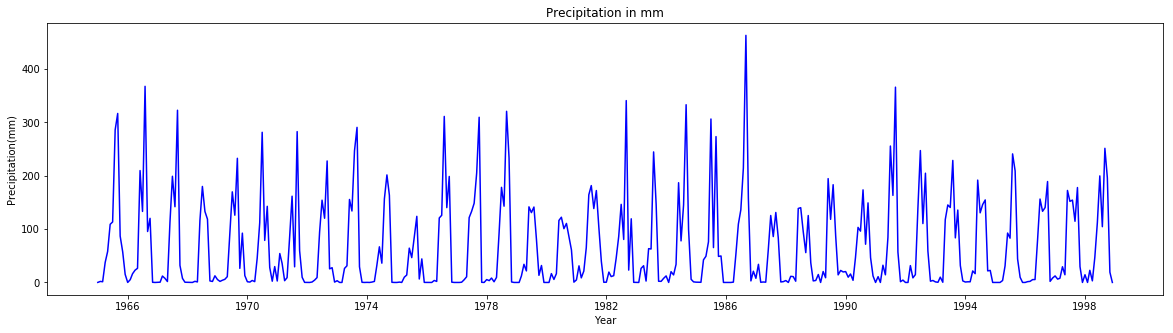

In [8]:
rainfall_data = pd.DataFrame({'Precipitation': rainfall_data_matrix_np[:,0]})
rainfall_data.set_index(dates, inplace=True)

plt.figure(figsize=(20,5))
plt.plot(rainfall_data, color='blue')
plt.xlabel('Year')
plt.ylabel('Precipitation(mm)')
plt.title('Precipitation in mm')
test_data = rainfall_data.ix['1995': '2002']
train_data = rainfall_data.ix[: '1994']
type(train_data)

In [9]:
train_data.tail() # 1965-1994

,Precipitation
1994-08-01,146.205
1994-09-01,154.741
1994-10-01,21.717
1994-11-01,22.529
1994-12-01,0.000


In [10]:
test_data.head() # 1995-2002

,Precipitation
1995-01-01,0.000
1995-02-01,0.000
1995-03-01,0.000
1995-04-01,3.621
1995-05-01,31.013


<h2> Data Plot</h2>

Text(0.5,1,'Precipitation data in mm of Latur from 1965-2002')

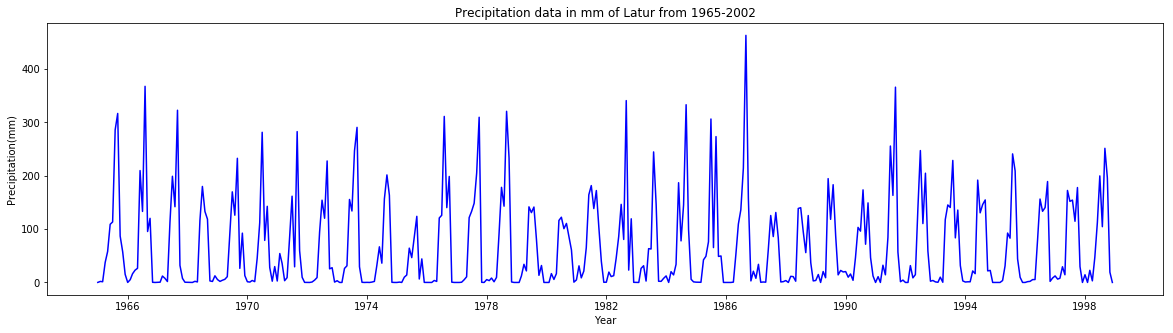

In [11]:
plt.figure(figsize=(20,5))
plt.plot(rainfall_data, color='blue')
plt.xlabel('Year')
plt.ylabel('Precipitation(mm)')
plt.title('Precipitation data in mm of Latur from 1965-2002')

<h2> Building the LSTM Model</h2>

In [12]:
# Let's load the required libs.
# We'll be using the Tensorflow backend (default).
from keras.utils.vis_utils import plot_model
from keras.models import Sequential
from keras.layers.recurrent import LSTM
from keras.layers.core import Dense, Activation, Dropout
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error
from sklearn.utils import shuffle

Using TensorFlow backend.


<p> Form the data plot, we clearly observe that there is no trend but seasonality component is present.</p>
<p> Seasonality may be due to the seasonal effects in the climate such as rainy season where more precipitation is expected than in summer or winter.</p>
<p> Unlike in ARIMA where we need to explicity find out the (P,D,Q) values, we don't need to do such ground work while using neural networks such as LSTMs.</p>
<p> We transform the data as follows for the reasons provided below</p>
<ul>
    <li>Normalize the data for increased numerical stability.</li>
    <li>Reshape the data so that we have one column for response varible(Y) and another for the predictor(X).</li>
</ul>

<b> Data Preparation</b>

In [13]:
# Get the raw data values from the pandas data frame.
data_raw = rainfall_data.values.astype("float32")

scaler = MinMaxScaler(feature_range=(0,1))
dataset = scaler.fit_transform(data_raw)

# Print a few values.
dataset[0:5]

array([[0.00021797],
       [0.00416307],
       [0.00284876],
       [0.08093059],
       [0.1252115 ]], dtype=float32)

<b>Split Data into Train and Test datasets</b>

In [14]:
#using 80% of data to train amd 20% to test

TRAIN_SIZE = 0.8
train_size = int(len(dataset)*TRAIN_SIZE)
test_size = len(dataset) - train_size
train, test = dataset[0:train_size, :], dataset[train_size:len(dataset), :]
print("Number of entries (training set, test set): " + str((len(train), len(test))))

Number of entries (training set, test set): (326, 82)


In [15]:
def create_dataset(dataset, window_size = 1):
    data_X, data_Y = [], []
    for i in range(len(dataset) - window_size - 1):
        a = dataset[i:(i + window_size), 0]
        data_X.append(a)
        data_Y.append(dataset[i + window_size, 0])
    return(np.array(data_X), np.array(data_Y))

In [16]:
# Create test and training sets for one-step-ahead regression.
window_size = 1
train_X, train_Y = create_dataset(train, window_size)
test_X, test_Y = create_dataset(test, window_size)
print("Original training data shape:")
# print(train_Y)
print(train_X.shape)
print(train_Y.shape)

# Reshape the input data into appropriate form for Keras.
train_X = np.reshape(train_X, (train_X.shape[0], 1, train_X.shape[1]))
test_X = np.reshape(test_X, (test_X.shape[0], 1, test_X.shape[1]))
train_Y = np.reshape(train_Y, (train_Y.shape[0], 1))
test_Y = np.reshape(test_Y, (test_Y.shape[0], 1))
print("New training data shape:")
print(train_X.shape)
print(train_Y.shape)

Original training data shape:
(324, 1)
(324,)
New training data shape:
(324, 1, 1)
(324, 1)


<b> Build a simple LSTM</b>
<p>The LSTM architecture here consists of:</p>
<ul>
<li>One input layer.</li>
<li>One LSTM layer of 4 blocks.</li>
<li>One Dense layer to produce a single output.</li>
<li>Use MSE as loss function.</li>
</ul>
<p>Many different architectures could be considered. But this is just a quick test, so we'll keep things nice and simple.</p>

In [25]:
def fit_model(train_X,train_Y,window_size=1):
    
    model = Sequential()
    model.add(LSTM(4,input_shape=(1,window_size)))
    model.add(Dense(1))
    model.compile(loss='mean_squared_error',
                 optimizer='adam', metrics=['mse', 'accuracy'])
    history = model.fit(train_X,train_Y,epochs=250,batch_size=1,verbose=2)
    return model,history

#fit the model
model1, history = fit_model(train_X, train_Y, window_size)
plot_model(model1, to_file='LSTM_Latur_plot.png', show_shapes=True, show_layer_names=True)
model1.summary()

Epoch 1/250
 - 1s - loss: 0.0318 - mean_squared_error: 0.0318 - acc: 0.1019
Epoch 2/250
 - 1s - loss: 0.0286 - mean_squared_error: 0.0286 - acc: 0.1019
Epoch 3/250
 - 1s - loss: 0.0280 - mean_squared_error: 0.0280 - acc: 0.1019
Epoch 4/250
 - 1s - loss: 0.0276 - mean_squared_error: 0.0276 - acc: 0.1019
Epoch 5/250
 - 1s - loss: 0.0273 - mean_squared_error: 0.0273 - acc: 0.1019
Epoch 6/250
 - 1s - loss: 0.0272 - mean_squared_error: 0.0272 - acc: 0.1019
Epoch 7/250
 - 1s - loss: 0.0269 - mean_squared_error: 0.0269 - acc: 0.1019
Epoch 8/250
 - 1s - loss: 0.0269 - mean_squared_error: 0.0269 - acc: 0.1019
Epoch 9/250
 - 1s - loss: 0.0267 - mean_squared_error: 0.0267 - acc: 0.1019
Epoch 10/250
 - 0s - loss: 0.0267 - mean_squared_error: 0.0267 - acc: 0.1019
Epoch 11/250
 - 1s - loss: 0.0263 - mean_squared_error: 0.0263 - acc: 0.1019
Epoch 12/250
 - 1s - loss: 0.0266 - mean_squared_error: 0.0266 - acc: 0.1019
Epoch 13/250
 - 1s - loss: 0.0264 - mean_squared_error: 0.0264 - acc: 0.1019
Epoch 14

Epoch 108/250
 - 1s - loss: 0.0224 - mean_squared_error: 0.0224 - acc: 0.1019
Epoch 109/250
 - 1s - loss: 0.0224 - mean_squared_error: 0.0224 - acc: 0.1019
Epoch 110/250
 - 1s - loss: 0.0224 - mean_squared_error: 0.0224 - acc: 0.1019
Epoch 111/250
 - 1s - loss: 0.0224 - mean_squared_error: 0.0224 - acc: 0.1019
Epoch 112/250
 - 1s - loss: 0.0223 - mean_squared_error: 0.0223 - acc: 0.1019
Epoch 113/250
 - 1s - loss: 0.0224 - mean_squared_error: 0.0224 - acc: 0.1019
Epoch 114/250
 - 1s - loss: 0.0224 - mean_squared_error: 0.0224 - acc: 0.1019
Epoch 115/250
 - 1s - loss: 0.0224 - mean_squared_error: 0.0224 - acc: 0.1019
Epoch 116/250
 - 1s - loss: 0.0223 - mean_squared_error: 0.0223 - acc: 0.1019
Epoch 117/250
 - 1s - loss: 0.0223 - mean_squared_error: 0.0223 - acc: 0.1019
Epoch 118/250
 - 1s - loss: 0.0224 - mean_squared_error: 0.0224 - acc: 0.1019
Epoch 119/250
 - 1s - loss: 0.0223 - mean_squared_error: 0.0223 - acc: 0.1019
Epoch 120/250
 - 1s - loss: 0.0223 - mean_squared_error: 0.0223 

 - 1s - loss: 0.0223 - mean_squared_error: 0.0223 - acc: 0.1019
Epoch 214/250
 - 1s - loss: 0.0223 - mean_squared_error: 0.0223 - acc: 0.1019
Epoch 215/250
 - 1s - loss: 0.0224 - mean_squared_error: 0.0224 - acc: 0.1019
Epoch 216/250
 - 1s - loss: 0.0222 - mean_squared_error: 0.0222 - acc: 0.1019
Epoch 217/250
 - 1s - loss: 0.0223 - mean_squared_error: 0.0223 - acc: 0.1019
Epoch 218/250
 - 1s - loss: 0.0224 - mean_squared_error: 0.0224 - acc: 0.1019
Epoch 219/250
 - 1s - loss: 0.0223 - mean_squared_error: 0.0223 - acc: 0.1019
Epoch 220/250
 - 1s - loss: 0.0223 - mean_squared_error: 0.0223 - acc: 0.1019
Epoch 221/250
 - 1s - loss: 0.0224 - mean_squared_error: 0.0224 - acc: 0.1019
Epoch 222/250
 - 1s - loss: 0.0224 - mean_squared_error: 0.0224 - acc: 0.1019
Epoch 223/250
 - 1s - loss: 0.0224 - mean_squared_error: 0.0224 - acc: 0.1019
Epoch 224/250
 - 1s - loss: 0.0223 - mean_squared_error: 0.0223 - acc: 0.1019
Epoch 225/250
 - 1s - loss: 0.0223 - mean_squared_error: 0.0223 - acc: 0.1019


<h2>Results</h2>

<b>Predictions and model evaluation</b>

In [26]:
def predict_and_score(model,X,Y):
    #Make predictions on the original scale of data
    pred = scaler.inverse_transform(model.predict(X))
    #Prepare Y also to be in original data scale
    orig_data = scaler.inverse_transform(model.predict(Y))
#     print(orig_data)
#     print("-----")
#     print(pred[:,0])
    #Calculate RMSE
    score = math.sqrt(mean_squared_error(orig_data, pred[:, 0]))
    return (score,pred)

train_rmse, train_predict = predict_and_score(model1, train_X, np.reshape(train_Y, (train_Y.shape[0], 1,1)))
test_rmse, test_predict = predict_and_score(model1, test_X, np.reshape(test_Y, (test_Y.shape[0],1, 1)))

print("Training data score: %.2f RMSE" % train_rmse)
print("Test data score: %.2f RMSE" % test_rmse)



Training data score: 44.77 RMSE
Test data score: 43.88 RMSE


In [27]:
# start with training predictions
train_predict_plot = np.empty_like(dataset)
train_predict_plot[:,:] = np.nan
train_predict_plot[window_size:len(train_predict) + window_size, :] = train_predict

# Add test predictions.
test_predict_plot = np.empty_like(dataset)
test_predict_plot[:, :] = np.nan
test_predict_plot[len(train_predict) + (window_size * 2) + 1:len(dataset) - 1, :] = test_predict



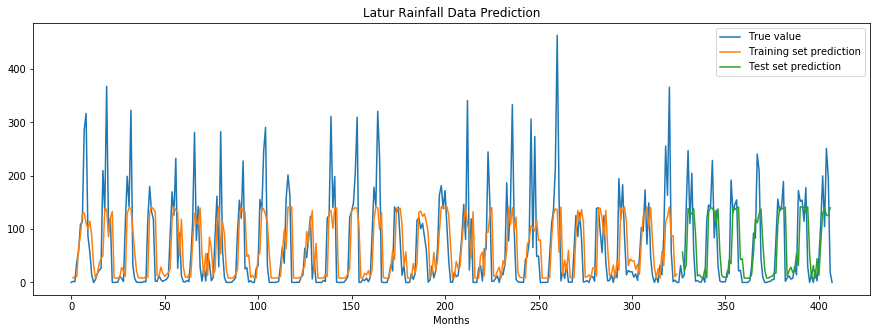

In [28]:
# Create the plot.
plt.figure(figsize = (15, 5))
plt.plot(scaler.inverse_transform(dataset), label = "True value")
plt.plot(train_predict_plot, label = "Training set prediction")
plt.plot(test_predict_plot, label = "Test set prediction")
plt.xlabel("Months")
plt.ylabel("")
plt.title("Latur Rainfall Data Prediction")
plt.legend()
plt.show()

['mean_squared_error', 'loss', 'acc']


KeyError: 'val_acc'

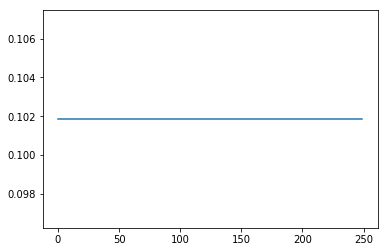

In [29]:
# list all data in history
print(history.history.keys())

# summarize history for accuracy
plt.plot(history.history['acc'])
plt.plot(history.history['val_acc'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

# summarize history for loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()